In [492]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [493]:
# Load the data you receive into a Pandas DataFrame

df=pd.read_csv('worldwide_covid_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    200 non-null    object 
 1   Total Cases                200 non-null    int64  
 2   Total Deaths               198 non-null    float64
 3   Total Recovered            198 non-null    float64
 4   Active Cases               198 non-null    float64
 5   Total Cases/1M population  200 non-null    int64  
 6   Deaths/1M population       198 non-null    float64
 7   Total Tests                196 non-null    float64
 8   Tests/1M population        196 non-null    float64
 9   Population                 200 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 15.8+ KB


In [494]:
# Show the first five rows of the data set.

df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
0,Afghanistan,155859,7247.0,127313.0,21299.0,3890,181.0,768249.0,19176.0,40063583
1,Albania,178804,2841.0,169674.0,6289.0,62220,989.0,1265601.0,440406.0,2873716
2,Algeria,205453,5875.0,140897.0,58681.0,4578,131.0,230861.0,5144.0,44877090
3,Andorra,15369,130.0,15162.0,77.0,198499,1679.0,193595.0,2500387.0,77426
4,Angola,63197,1678.0,51770.0,9749.0,1848,49.0,1043451.0,30521.0,34188339


In [495]:
# Show the description of df
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
count,2.000000e+02,198.000000,1.980000e+02,1.980000e+02,200.000000,198.000000,1.960000e+02,1.960000e+02,2.000000e+02
mean,1.211981e+06,24901.090909,1.100960e+06,8.817780e+04,53265.535000,876.949495,1.971325e+07,1.048982e+06,3.927459e+07
std,4.474061e+06,82915.288999,3.924235e+06,6.871396e+05,49917.134628,930.589070,7.172560e+07,1.839229e+06,1.467939e+08
min,7.700000e+01,2.000000,5.500000e+01,2.000000e+00,67.000000,3.000000,4.988000e+03,3.291000e+03,3.402400e+04
25%,2.106150e+04,256.000000,1.466025e+04,6.320000e+02,5528.750000,108.500000,3.040015e+05,1.041622e+05,1.448274e+06
50%,1.514615e+05,2342.000000,1.262860e+05,8.280000e+03,43968.500000,564.000000,1.850256e+06,4.475575e+05,8.610792e+06
75%,6.011568e+05,11285.750000,5.603202e+05,2.884200e+04,86445.000000,1469.750000,1.015682e+07,1.227182e+06,2.840155e+07
max,4.599651e+07,748652.000000,3.571033e+07,9.537524e+06,220937.000000,5956.000000,6.739791e+08,1.458358e+07,1.439324e+09


In [496]:
# Show the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    200 non-null    object 
 1   Total Cases                200 non-null    int64  
 2   Total Deaths               198 non-null    float64
 3   Total Recovered            198 non-null    float64
 4   Active Cases               198 non-null    float64
 5   Total Cases/1M population  200 non-null    int64  
 6   Deaths/1M population       198 non-null    float64
 7   Total Tests                196 non-null    float64
 8   Tests/1M population        196 non-null    float64
 9   Population                 200 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 15.8+ KB


In [497]:
# To clean the df from Nan
df.isnull().sum()  #to check if we have nans in our df
df['Total Deaths'] = df['Total Deaths'].fillna(0) # replace Nan values with Zeros 
df.isnull().sum() # check that its correctly replaced or not


Country                      0
Total Cases                  0
Total Deaths                 0
Total Recovered              2
Active Cases                 2
Total Cases/1M population    0
Deaths/1M population         2
Total Tests                  4
Tests/1M population          4
Population                   0
dtype: int64

45996507

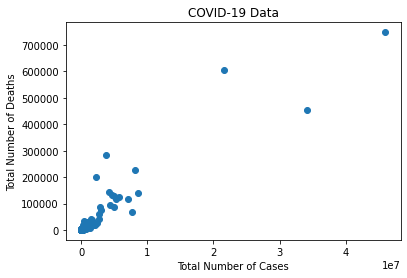

In [498]:
# Test Draw

plt.scatter(df['Total Cases'],df['Total Deaths'])
plt.xlabel('Total Number of Cases')
plt.ylabel('Total Number of Deaths')
plt.title('COVID-19 Data')
df['Total Cases'].max()


In [499]:
# Calculating the correlation

df[['Total Deaths','Total Cases']].corr()

,Total Deaths,Total Cases
Total Deaths,1.000000,0.933552
Total Cases,0.933552,1.000000


In [500]:
#select features
independent_variable=df['Total Cases'].values  # independent variable, observation
dependent_variable=df['Total Deaths'].values  # dependent variable
independent_variable
# dependent_variable

array([  155859,   178804,   205453,    15369,    63197,     3918,
        5274766,   286303,    15746,   149421,   783996,   505554,
          22048,   276262,  1566296,    13553,   575856,  1292887,
          24768,    24560,     5593,     2617,   507134,   245791,
         184051, 21664879,    11220,   550555,    14759,    19745,
          38052,   117201,   100289,  1687608,    11478,     1095,
           5067,    12413,  1672998,    96601,  4983527,     4194,
          15962,   553661,   429974,   938577,    16955,   120987,
        1715515,   370159,    13423,     4366,   372077,    57338,
         514087,   320207,   110188,    13020,     6778,   175782,
          46372,   359881,    51846,   151787,  7096043,    43690,
          40178,    33842,     9946,   675771,  4410332,   129592,
         700959,      688,     5776,    54152,   589986,    30599,
           6130,    34608,    23324,   373206,    12302,   838916,
          12703, 34108996,  4236287,  5809967,  2038847,   419

In [501]:
# converting the independent variable into  matrix because (train_test_split) takes a matrix of independent variable as its first parameter.

test_matrix=independent_variable.reshape(-1,1)
test_matrix


array([[  155859],
       [  178804],
       [  205453],
       [   15369],
       [   63197],
       [    3918],
       [ 5274766],
       [  286303],
       [   15746],
       [  149421],
       [  783996],
       [  505554],
       [   22048],
       [  276262],
       [ 1566296],
       [   13553],
       [  575856],
       [ 1292887],
       [   24768],
       [   24560],
       [    5593],
       [    2617],
       [  507134],
       [  245791],
       [  184051],
       [21664879],
       [   11220],
       [  550555],
       [   14759],
       [   19745],
       [   38052],
       [  117201],
       [  100289],
       [ 1687608],
       [   11478],
       [    1095],
       [    5067],
       [   12413],
       [ 1672998],
       [   96601],
       [ 4983527],
       [    4194],
       [   15962],
       [  553661],
       [  429974],
       [  938577],
       [   16955],
       [  120987],
       [ 1715515],
       [  370159],
       [   13423],
       [    4366],
       [  37

In [502]:
# Using a regression model, split your data into train and test data.

independent_train, independent_test, dependent_train, dependent_test = train_test_split(test_matrix, dependent_variable, train_size=0.8, test_size=0.2, random_state=20)
print(f"independent_train shape [{independent_train.shape}")
print(f"dependent_train shape [{dependent_train.shape}")
print(f"independent_test shape [{independent_test.shape}")
print(f"dependent_test shape [{dependent_test.shape}")

independent_train shape [(160, 1)
dependent_train shape [(160,)
independent_test shape [(40, 1)
dependent_test shape [(40,)


In [503]:
# Create an instance of the LinearRegression class and use the fit method to train our model
linear_model=LinearRegression()
# Fit your training split to the regression model.
linear_model.fit(independent_train,dependent_train)
# prediction
predict = linear_model.predict(independent_test)

independent_test


array([[   54438],
       [   14759],
       [  276262],
       [   39902],
       [   80085],
       [   21269],
       [  858198],
       [  870255],
       [  120987],
       [  395223],
       [  209546],
       [   30599],
       [ 7714379],
       [  443214],
       [   12703],
       [   47284],
       [    2589],
       [  310170],
       [ 3762689],
       [  391358],
       [ 1163595],
       [ 2401866],
       [  419087],
       [ 2945056],
       [   54405],
       [   25769],
       [  132405],
       [  942779],
       [    3918],
       [  921216],
       [   11478],
       [  304066],
       [  429974],
       [  700959],
       [   19730],
       [34108996],
       [  238079],
       [   16955],
       [ 4236287],
       [   61732]])

In [504]:
# check the prediction
predict

array([  3523.05887255,   2781.47385142,   7668.86284256,   3251.38670674,
         4002.39129113,   2903.14321022,  18545.01952124,  18770.36014473,
         4766.83370485,   9892.1974956 ,   6421.96684545,   3077.51726821,
       146684.36607029,  10789.1305521 ,   2743.04801399,   3389.35340515,
         2554.02130204,   8302.59012642,  72828.82253017,   9819.96215432,
        24252.77023815,  47395.57186352,  10338.20634018,  57547.58092687,
         3522.44211543,   2987.24645362,   4980.23166778,  20125.80539466,
         2578.85979326,  19722.80134188,   2720.15324218,   8188.50874914,
        10541.68012039,  15606.28399018,   2874.37990097, 639989.4545434 ,
         6955.23747746,   2822.51623421,  81680.18427907,   3659.3808853 ])

In [505]:
# Show your regression model’s score.
print(f"Train accuracy {round(linear_model.score(independent_train, dependent_train) * 100, 2)}%")
print(f"Test accuracy {round(linear_model.score(independent_test, predict) * 100, 2)}%")

Train accuracy 91.46%
Test accuracy 100.0%


Text(0.5, 1.0, 'COVID-19 Data : Trained Model')

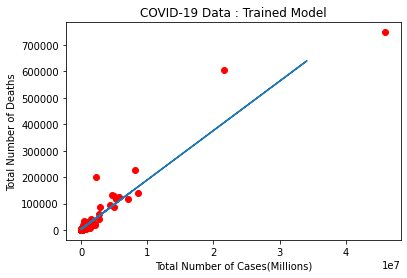

In [506]:
# Draw for the trained Model

plt.scatter(independent_train,dependent_train, color='red')
plt.plot(independent_test,predict)
plt.xlabel("Total Number of Cases(Millions)")
plt.ylabel("Total Number of Deaths")
plt.title("COVID-19 Data : Trained Model")

### Draw at least three conclusions from your regression model.

* In general,While the numbers of cases of COVID-19 increases we will have more Number of Deaths
* From the previous Draws a recognized that always there is Information out of range and there must be a way to clean them 
* The prediction will be different depending on the size of the training data and the test data and mainly it follows 70/30 rule , 70 percent for the training and 30 percent for the test